# Using APIs to scrape data

Today we'll learn how to scrape data from websites using APIs. In particular, we'll be using the PRAW Python library to get data from [Reddit](http://reddit.com).

Things to know about APIs:

- API stands for Application Programming Interface. APIs are a great way for your program to interface with other applications to get data

- APIs aren't some magical thing that all websites have. The developers of every website may or may not choose to build and maintain an API that the public can use.
    - If there isn't an API and you really want to get data from a website, you will have to scrape the HTML

- Many popular sites have APIs! Often times, using APIs is much easier than manually scraping a website for data.

- APIs are absolutely essential to know if you are interested in web development or working with web data.


## Reddit API Client Setup
Today we'll be using PRAW to access Reddit data from Python.

For simplicity, we have already set up an account for you guys to play with. If you are interested in creating your own reddit bot, the setup guides you need are [here](https://praw.readthedocs.io/en/latest/getting_started/quick_start.html) and [here](https://github.com/reddit-archive/reddit/wiki/OAuth2).

First, we'll create a Reddit instance to use the API.


In [14]:
import praw

reddit = praw.Reddit(client_id='TpLAyz8_D5A8FA',
                     client_secret='MtHyUXr84NF6AMbPjWm7e50x9mY',
                     user_agent='Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/60.0.3112.113 Safari/537.36',
                     username='hackcvillenode',
                     password='hackcvillenode')

- client_id: ID given to every reddit API client

- client_secret: password given to every reddit API client

- user_agent: a string describing the device accessing the API

- username: associated reddit account username (optional)

- password: associated reddit account password (optional)

## Retrieving post data using APIs

As a quick warm up, we'll print out the top 10 posts on [http://reddit.com/r/dataisbeautiful](http://reddit.com/r/dataisbeautiful) and the number of upvotes and name of the author of each post.

Note: If you are ever unsure how to access parts of the API, the best thing you can do is to consult the API documentation. PRAW's documentation is here: https://praw.readthedocs.io/en/latest/index.html

In [15]:
print("Upvotes\tTitle")
for submission in reddit.subreddit('dataisbeautiful').hot(limit=10):
    print("{}\t{}".format(submission.ups, submission.title))
    print("\t by: " + submission.author.name)

Upvotes	Title
45	[Battle] DataViz Battle for the month of March 2018: Visualize Over 100,000 Stars
	 by: AutoModerator
19	[Topic][Open] Open Discussion Monday — Anybody can post a general visualization question or start a fresh discussion!
	 by: AutoModerator
1117	I tracked the time I spent in each app every day for 15 weeks. After seven weeks I tried to cut back. [OC]
	 by: mooneyse
10239	5 different brands of Alkaline AA batteries, tested with the same resistive load. [OC]
	 by: GoBay33
80369	11 different brands of AA batteries, tested in identical flashlights. [OC]
	 by: thecrispiestbacon
13	The most frequently used word in job descriptions is 'experience'
	 by: mon_d2
14	Bulgarian Goverment Budget report by sectors and years [OC]
	 by: VessoVit
25	Categorical spatial interpolation with R [OC]
	 by: wnstnsmth
288	What is the Pizza Capital of the US?
	 by: linuxrebel
11	Shakespeare Character Network Graphs [OC]
	 by: 76willcommenceagain


Ok, that's really cool! But it is a little hard to read. Let's try this again, but this time let's put the data into a Pandas dataframe

In [16]:
import pandas as pd
from datetime import datetime
from dateutil import tz
df = pd.DataFrame([], columns="Upvotes Title Author URL NumComments Date".split())
df.head()

for submission in reddit.subreddit('dataisbeautiful').hot(limit=15):
    if (submission.over_18 or submission.author.name == "AutoModerator"): # Node is 100% SFW ;)
        continue
    df = df.append({
        "Upvotes": submission.ups,
        "Title": submission.title,
        "Author": submission.author.name,
        "URL": submission.url,
        "NumComments": submission.num_comments,
        "Date": datetime.utcfromtimestamp(submission.created_utc), # Date is stored as an integer.
                                                                   # This converts the number to a datetime object.
    }, ignore_index=True)

df.head(10)

,Upvotes,Title,Author,URL,NumComments,Date
0,1124,I tracked the time I spent in each app every d...,mooneyse,https://seanmooneyorg.files.wordpress.com/2018...,43,2018-03-18 12:04:39
1,10242,"5 different brands of Alkaline AA batteries, t...",GoBay33,https://i.imgur.com/grWpNCt.jpg,623,2018-03-17 22:08:22
2,80378,"11 different brands of AA batteries, tested in...",thecrispiestbacon,https://i.redd.it/aiuv4unoedm01.jpg,4457,2018-03-17 19:13:26
3,15,The most frequently used word in job descripti...,mon_d2,https://www.jobspikr.com/blog/interesting-insi...,14,2018-03-18 16:34:02
4,15,Bulgarian Goverment Budget report by sectors a...,VessoVit,https://i.redd.it/n2ap9q7jtim01.png,7,2018-03-18 13:07:33
5,24,Categorical spatial interpolation with R [OC],wnstnsmth,https://timogrossenbacher.ch/2018/03/categoric...,5,2018-03-18 09:17:20
6,285,What is the Pizza Capital of the US?,linuxrebel,https://medium.com/google-news-lab/what-is-the...,57,2018-03-17 19:46:27
7,11,Shakespeare Character Network Graphs [OC],76willcommenceagain,https://imgur.com/a/ZxMAI,3,2018-03-18 12:33:49
8,71,[OC] I sometimes get asked about having an ele...,pwapwap,https://imgur.com/a/zBeOT/,8,2018-03-17 23:19:18
9,2,The beautiful 2-year clickdeath of a bad clien...,snowinspired,https://i.redd.it/2pschyt3bkm01.jpg,1,2018-03-18 18:13:33


If you want to see every single data attribute of a post, use the Python `vars()` function.

In [17]:
vars(reddit.subreddit('popular').hot(limit=1).next())

{'_comments_by_id': {},
 '_fetched': False,
 '_flair': None,
 '_info_params': {},
 '_mod': None,
 '_reddit': <praw.reddit.Reddit at 0x11f5e45f8>,
 'approved_at_utc': None,
 'approved_by': None,
 'archived': False,
 'author': Redditor(name='GallowBoob'),
 'author_flair_css_class': None,
 'author_flair_text': None,
 'banned_at_utc': None,
 'banned_by': None,
 'brand_safe': True,
 'can_gild': True,
 'can_mod_post': False,
 'clicked': False,
 'comment_limit': 2048,
 'comment_sort': 'best',
 'contest_mode': False,
 'created': 1521415032.0,
 'created_utc': 1521386232.0,
 'distinguished': None,
 'domain': 'i.imgur.com',
 'downs': 0,
 'edited': False,
 'gilded': 0,
 'hidden': False,
 'hide_score': False,
 'id': '85btg8',
 'is_crosspostable': True,
 'is_reddit_media_domain': False,
 'is_self': False,
 'is_video': False,
 'likes': None,
 'link_flair_css_class': None,
 'link_flair_text': None,
 'locked': False,
 'media': None,
 'media_embed': {},
 'mod_note': None,
 'mod_reason_by': None,
 'mod_r

## Retrieving user data with the PRAW API

Getting data about users is similar to getting data about posts.

Let's retrieve information about the 50 most recent comments made by /u/spez, one of reddit's founders.

First let's see what kind of attributes a comment has.

In [18]:
vars(reddit.redditor('spez').comments.new(limit=1).next())

{'_fetched': True,
 '_info_params': {},
 '_mod': None,
 '_reddit': <praw.reddit.Reddit at 0x11f5e45f8>,
 '_replies': [],
 '_submission': None,
 'approved_at_utc': None,
 'approved_by': None,
 'archived': False,
 'author': Redditor(name='spez'),
 'author_flair_css_class': None,
 'author_flair_text': None,
 'banned_at_utc': None,
 'banned_by': None,
 'body': 'There it is. ',
 'body_html': '<div class="md"><p>There it is. </p>\n</div>',
 'can_gild': True,
 'can_mod_post': False,
 'collapsed': False,
 'collapsed_reason': None,
 'controversiality': 1,
 'created': 1521082345.0,
 'created_utc': 1521053545.0,
 'distinguished': None,
 'downs': 0,
 'edited': False,
 'gilded': 0,
 'id': 'dvp6tjq',
 'is_submitter': False,
 'likes': None,
 'link_author': 'A_Marantz',
 'link_id': 't3_84fbey',
 'link_permalink': 'https://www.reddit.com/r/IAmA/comments/84fbey/i_am_andrew_marantz_a_writer_at_the_new_yorker/',
 'link_title': 'I am Andrew Marantz, a writer at The New Yorker.',
 'link_url': 'https://www.r

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

df = pd.DataFrame([], columns="Score Body URL Date".split())
df.head()

for comment in reddit.redditor('spez').comments.new(limit=200):
    if (comment.over_18): # Node is 100% SFW ;)
        continue
    df = df.append({
        "Score": comment.score,
        "Body": comment.body,
        "URL": comment.link_permalink,
        "Date": datetime.utcfromtimestamp(comment.created_utc), # Date is stored as an integer.
                                                                   # This converts the number to a datetime object.
    }, ignore_index=True)

df.head(10)

,Score,Body,URL,Date
0,-21,There it is.,https://www.reddit.com/r/IAmA/comments/84fbey/...,2018-03-14 18:52:25
1,-24,Allow me to assist... the trolls should be her...,https://www.reddit.com/r/IAmA/comments/84fbey/...,2018-03-14 18:40:43
2,-288,"I didn't succeed in making it much shorter, ei...",https://www.reddit.com/r/announcements/comment...,2018-03-06 02:31:24
3,-878,This post is really the first time we've said ...,https://www.reddit.com/r/announcements/comment...,2018-03-06 02:27:31
4,-272,I'm sorry that's your experience. That's certa...,https://www.reddit.com/r/announcements/comment...,2018-03-06 02:18:47
5,-719,Point taken. Didn't mean to mislead. I was ref...,https://www.reddit.com/r/announcements/comment...,2018-03-06 01:46:12
6,983,We don’t take banning subs lightly. Each sub i...,https://www.reddit.com/r/announcements/comment...,2018-03-05 21:16:11
7,-4834,> So I see you are carrying on the Reddit Trad...,https://www.reddit.com/r/announcements/comment...,2018-03-05 18:58:35
8,3593,"We are aware, and this community is under revi...",https://www.reddit.com/r/announcements/comment...,2018-03-05 18:53:07
9,823,These are the important questions we should be...,https://www.reddit.com/r/announcements/comment...,2018-03-05 18:48:03


Awesome!

Let's try to incorporate some data vis. Let's graph /u/spez's comment score with respect to time.

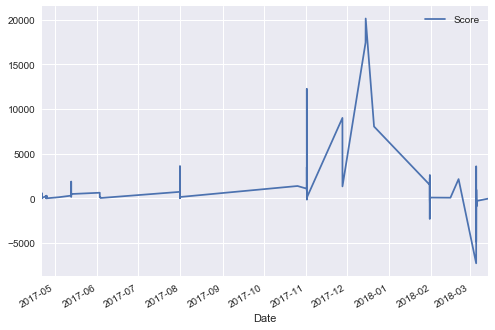

In [20]:
df[['Date','Score']].set_index('Date').plot()
plt.show()

# Ok cool, so what can I do with this?
## Some project ideas:
- scrape the /r/cryptocurrency subreddit to see what the next hype cryptocurrency might be
- scrape /r/politics and use sentiment analysis to find peoples' opinions on political matters
- find if there is a correlation between comment positivity and comment score

## Some cool APIs for python
- Spotify
    - http://spotipy.readthedocs.io/en/latest/#
    - analyze your listening history?
- Twitter
    - http://docs.tweepy.org/en/v3.6.0/getting_started.html
    - you'll learn about this soon!
- Facebook
    - https://github.com/facebookarchive/python-instagram
- Wikipedia
    - https://pypi.python.org/pypi/wikipedia